# Decision Tree Regression Model Building

Data Collection:
    https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [37]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/household_power_consumption.txt", sep=";")

### Checking shape of the dataset

In [38]:
df.shape

(2075259, 9)

In [39]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Taking sample data of 50K

In [40]:
data = df.sample(n=50000, ignore_index=True)

In [41]:
data[data['Date'] == '16/12/2006']

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2974,16/12/2006,21:51:00,3.494,0.170,236.280,14.800,0.000,1.000,17.0
6409,16/12/2006,20:55:00,1.832,0.170,237.540,8.400,0.000,0.000,17.0
12029,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
13073,16/12/2006,23:49:00,1.206,0.000,241.830,5.400,0.000,0.000,0.0
17197,16/12/2006,20:04:00,3.194,0.078,231.980,13.600,0.000,0.000,16.0
19256,16/12/2006,23:11:00,2.336,0.060,240.070,9.600,0.000,0.000,0.0
26708,16/12/2006,19:29:00,3.614,0.192,233.920,15.400,0.000,5.000,17.0
29255,16/12/2006,18:59:00,4.224,0.090,231.960,18.200,0.000,1.000,16.0
32870,16/12/2006,18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0
38472,16/12/2006,21:28:00,3.494,0.144,237.430,14.600,0.000,0.000,17.0


### Data Cleaning

In [42]:
data.isnull().sum()

Date                       0
Time                       0
Global_active_power        0
Global_reactive_power      0
Voltage                    0
Global_intensity           0
Sub_metering_1             0
Sub_metering_2             0
Sub_metering_3           642
dtype: int64

In [43]:
# creating bool series True for NaN values
bool_series = pd.isnull(data["Sub_metering_3"])
   
# filtering data
# displaying data only with Sub_metering_3 = NaN
data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
189,12/1/2010,15:17:00,?,?,?,?,?,?,NaN
238,30/4/2007,07:52:00,?,?,?,?,?,?,NaN
368,14/1/2010,16:11:00,?,?,?,?,?,?,NaN
439,14/1/2010,16:30:00,?,?,?,?,?,?,NaN
477,28/9/2010,08:02:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
49772,21/8/2010,05:06:00,?,?,?,?,?,?,NaN
49835,14/1/2010,08:13:00,?,?,?,?,?,?,NaN
49877,22/8/2010,04:27:00,?,?,?,?,?,?,NaN
49922,13/6/2009,02:38:00,?,?,?,?,?,?,NaN


**Observation:**
Except Date and Time columns, all columns are having no data

### Replacing '?' with np.nan

In [44]:
data.replace('?',np.nan,inplace=True)

In [45]:
data.dropna(axis=0,inplace=True)

In [46]:
data.reset_index(inplace = True, drop = True)

In [47]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,30/4/2010,21:30:00,0.846,0.142,239.240,3.600,0.000,0.000,11.0
1,2/12/2007,11:35:00,2.570,0.316,234.800,11.000,0.000,0.000,17.0
2,26/4/2007,05:57:00,0.190,0.070,237.690,0.800,0.000,0.000,0.0
3,31/1/2009,07:25:00,2.404,0.000,243.460,9.800,0.000,0.000,18.0
4,10/4/2009,23:15:00,0.694,0.062,242.720,3.200,0.000,0.000,8.0


In [48]:
data.shape

(49358, 9)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   49358 non-null  object 
 1   Time                   49358 non-null  object 
 2   Global_active_power    49358 non-null  object 
 3   Global_reactive_power  49358 non-null  object 
 4   Voltage                49358 non-null  object 
 5   Global_intensity       49358 non-null  object 
 6   Sub_metering_1         49358 non-null  object 
 7   Sub_metering_2         49358 non-null  object 
 8   Sub_metering_3         49358 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.4+ MB


In [50]:
data['Date'].unique()

array(['30/4/2010', '2/12/2007', '26/4/2007', ..., '17/2/2009',
       '22/8/2010', '20/3/2010'], dtype=object)

### spliting the Date column into 3 columns - Day, Month, Year

In [51]:
data['Date1']=data.Date.apply(lambda x:x.split('/')[0]).astype(int)
data['Month']=data.Date.apply(lambda x:x.split('/')[1]).astype(int)
data['Year']=data.Date.apply(lambda x:x.split('/')[2]).astype(int)

In [52]:
data['Time'].value_counts()

22:45:00    61
04:58:00    57
04:11:00    56
14:32:00    55
21:30:00    52
            ..
14:41:00    19
00:16:00    19
02:07:00    18
22:47:00    17
15:41:00    16
Name: Time, Length: 1440, dtype: int64

### spliting the Time column into 2 columns - Hours and Minutes

In [53]:
data['hour']=data.Time.apply(lambda x:x.split(' ')[0].split(':')[0]).astype('int')
data['min']=data.Time.apply(lambda x:x.split(' ')[0].split(':')[1]).astype('int')

### Removing Date and Time columns 

In [54]:
data.drop(['Date','Time'],axis=1,inplace=True)

### Changing the datatype of few columns from Object to Float

In [55]:
data['Global_active_power'] = data['Global_active_power'].astype(float)
data['Global_reactive_power'] = data['Global_reactive_power'].astype(float)
data['Voltage'] = data['Voltage'].astype(float)
data['Global_intensity'] = data['Global_intensity'].astype(float)
data['Sub_metering_1'] = data['Sub_metering_1'].astype(float)
data['Sub_metering_2'] = data['Sub_metering_2'].astype(float)
data['Sub_metering_3'] = data['Sub_metering_3'].astype(float)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49358 entries, 0 to 49357
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49358 non-null  float64
 1   Global_reactive_power  49358 non-null  float64
 2   Voltage                49358 non-null  float64
 3   Global_intensity       49358 non-null  float64
 4   Sub_metering_1         49358 non-null  float64
 5   Sub_metering_2         49358 non-null  float64
 6   Sub_metering_3         49358 non-null  float64
 7   Date1                  49358 non-null  int64  
 8   Month                  49358 non-null  int64  
 9   Year                   49358 non-null  int64  
 10  hour                   49358 non-null  int64  
 11  min                    49358 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 4.5 MB


### Merging Sub_metering_1, Sub_metering_1, Sub_metering_1 into Total_Consumption

In [57]:
data['Total_Consumption'] = data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']

In [58]:
data.drop(axis=1, columns=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'], inplace=True)

In [59]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Date1,Month,Year,hour,min,Total_Consumption
0,0.846,0.142,239.24,3.6,30,4,2010,21,30,11.0
1,2.570,0.316,234.80,11.0,2,12,2007,11,35,17.0
2,0.190,0.070,237.69,0.8,26,4,2007,5,57,0.0
3,2.404,0.000,243.46,9.8,31,1,2009,7,25,18.0
4,0.694,0.062,242.72,3.2,10,4,2009,23,15,8.0


### Checking duplicates

In [60]:
data.duplicated().sum()

0

#### Dependent and Independent Variables

In [62]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [63]:
X.shape, y.shape

((49358, 9), (49358,))

### Train Test split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37018, 9), (12340, 9), (37018,), (12340,))

### Decision Tree without Hyper parameter tunning

In [66]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [67]:
dt.score(X_train, y_train)

1.0

In [68]:
y_pred = dt.predict(X_test)

In [ ]:
dt.score(X_test, y_test)

0.7436170804891238

### Model is Overfitting . We need to prun the Tree

### Decision Tree with Hyper parameter tunning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
parameters = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
             'splitter' : ['best', 'random'],
             'max_depth' : [7,8,9,10],
             'min_samples_split' : [10],
             'max_features': ['auto', 'sqrt', 'log2']}

In [74]:
regressorcv = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=parameters, cv=5,n_jobs=-1)

In [75]:
regressorcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [10],
                         'splitter': ['best', 'random']})

In [76]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 10,
 'splitter': 'best'}

In [77]:
regressor_best_param = DecisionTreeRegressor(criterion='squared_error',max_depth= 10,max_features='auto',splitter='best',min_samples_split=10)

In [78]:
regressor_best_param.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_split=10)

In [84]:
regressor_best_param.score(X_train, y_train)

0.8904654543563059

In [79]:
y_pred = regressor_best_param.predict(X_test)

### R2 score

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2_score(y_test,y_pred)

0.8258909867121225

In [82]:
### Tree Visualization

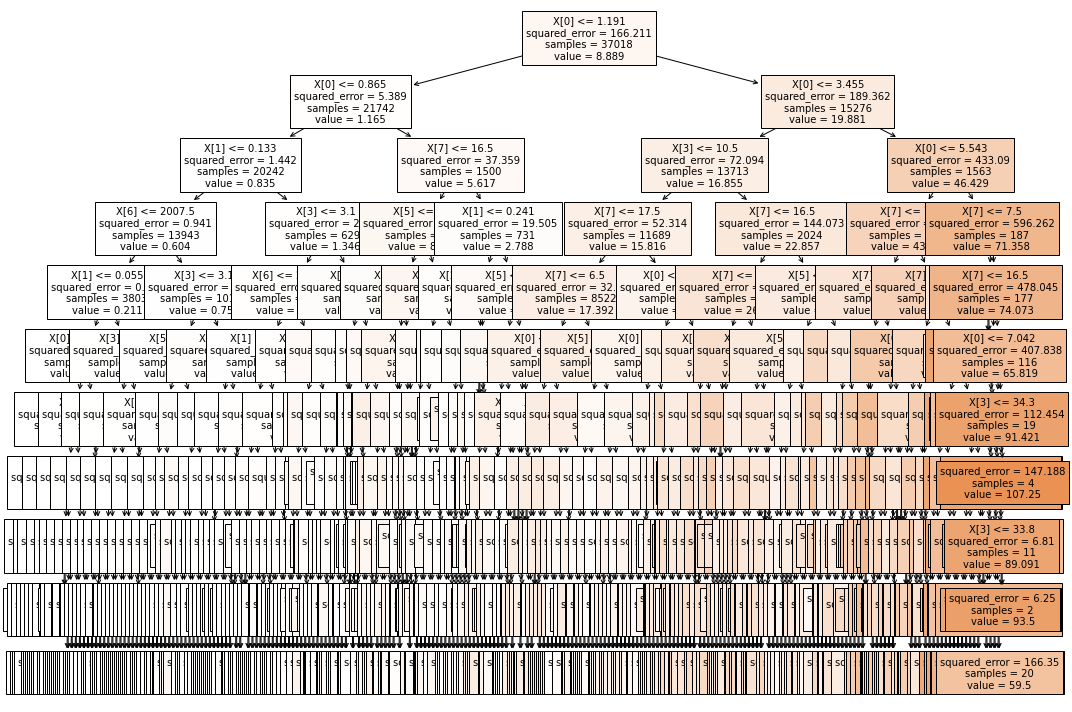

In [83]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor_best_param,filled=True, fontsize=10)
plt.tight_layout()